# Análise dos logs da execução

#### Imports

In [15]:
import os
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (14,8)

In [8]:
path_hc = "../data/logs_hill_climbing.csv"
path_ga = "../data/logs_genetic.csv"

try: 
    df_hc = pd.read_csv(path_hc)
    df_ga = pd.read_csv(path_ga)

  
    df = pd.concat([df_hc, df_ga], ignore_index=True)
    
    print("Dados carregados com sucesso!")
    print(f"Total de registros: {len(df)}")
    display(df.head())
    
except FileNotFoundError:
    print("rquivos não encontrados. Verifique se você está rodando o notebook na raiz do projeto.")

Dados carregados com sucesso!
Total de registros: 100


,Algoritmo,Execução,Solução,Colisões,Iterações,Tempo (s)
0,Stochastic Hill Climbing,1,"[3, 6, 0, 5, 1, 5, 7, 2]",1,557,0.002050
1,Stochastic Hill Climbing,2,"[6, 3, 0, 7, 1, 4, 2, 0]",1,582,0.002347
2,Stochastic Hill Climbing,3,"[0, 3, 5, 7, 1, 4, 2, 5]",1,541,0.002196
3,Stochastic Hill Climbing,4,"[6, 0, 6, 1, 7, 5, 3, 2]",2,508,0.002048
4,Stochastic Hill Climbing,5,"[6, 1, 5, 2, 0, 3, 7, 4]",0,123,0.000504


In [18]:
df.shape

(100, 6)

#### Métricas base

In [9]:
summary = df.groupby('Algoritmo')[['Tempo (s)', 'Iterações']].agg(['mean', 'std', 'min', 'max'])

summary.columns = ['Média', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Média', 'Desvio Padrão', 'Mínimo', 'Máximo']
display(summary)

,Média,Desvio Padrão,Mínimo,Máximo,Média,Desvio Padrão,Mínimo,Máximo
Algoritmo,,,,,,,,
Genetic Algorithm,0.084966,0.063343,0.003940,0.233703,526.26,384.079860,25,1000
Stochastic Hill Climbing,0.001525,0.000569,0.000179,0.002664,514.44,133.159435,70,763


In [10]:
sucesso_absoluto = df[df['Colisões'] == 0].groupby('Algoritmo').size()
taxa_sucesso = (sucesso_absoluto / 50 * 100).reindex(df['Algoritmo'].unique(), fill_value=0)
print(taxa_sucesso)

Algoritmo
Stochastic Hill Climbing    10.0
Genetic Algorithm           66.0
dtype: float64


#### Análise visual de tempo e esforço

/tmp/ipykernel_69769/3302538970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Algoritmo', y='Tempo (s)', ax=axes[0], palette="viridis")
/tmp/ipykernel_69769/3302538970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Algoritmo', y='Iterações', ax=axes[1], palette="magma")


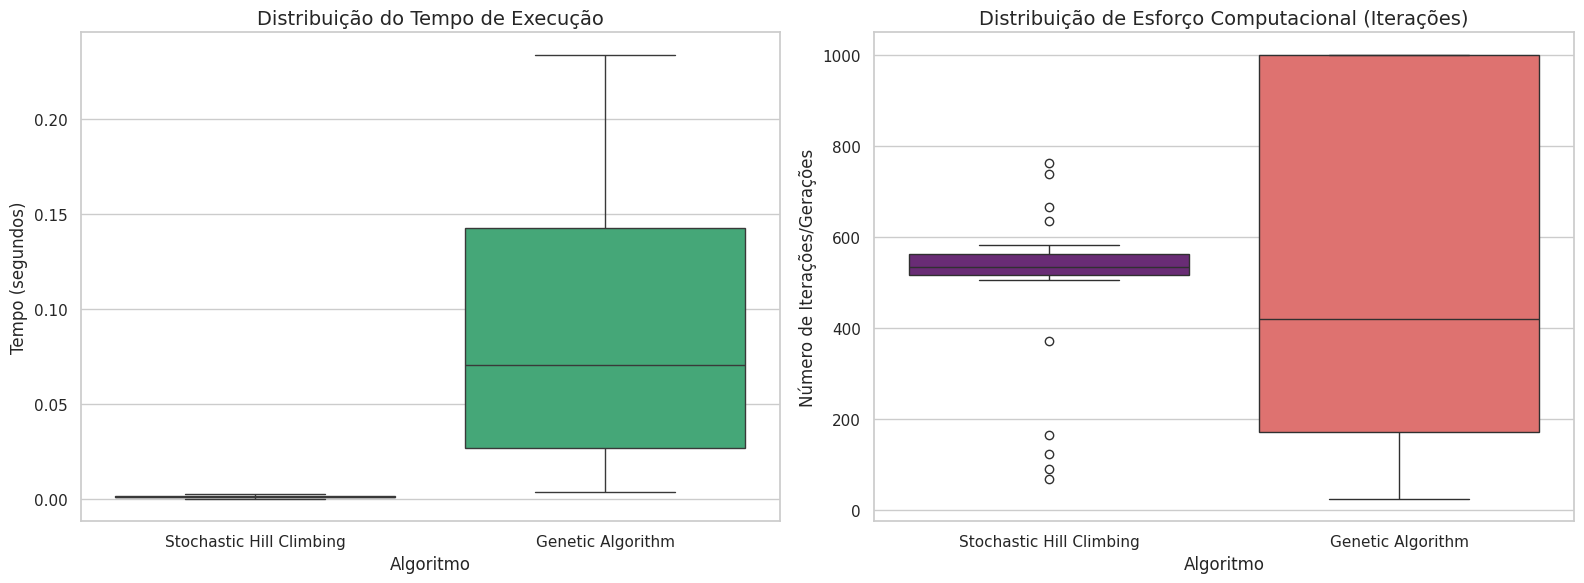

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='Algoritmo', y='Tempo (s)', ax=axes[0], palette="viridis")
axes[0].set_title('Distribuição do Tempo de Execução', fontsize=14)
axes[0].set_ylabel('Tempo (segundos)')

sns.boxplot(data=df, x='Algoritmo', y='Iterações', ax=axes[1], palette="magma")
axes[1].set_title('Distribuição de Esforço Computacional (Iterações)', fontsize=14)
axes[1].set_ylabel('Número de Iterações/Gerações')

plt.tight_layout()
plt.show()

#### Análise de Convergências 

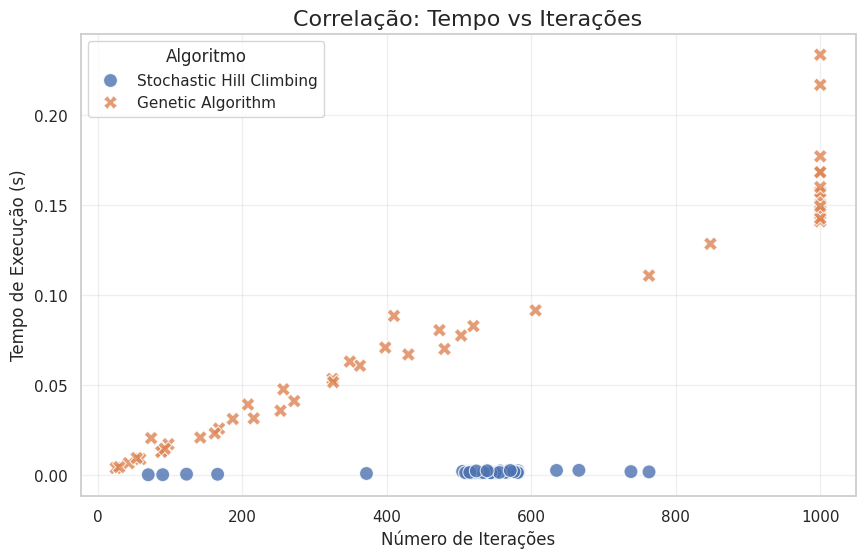

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df, 
    x='Iterações', 
    y='Tempo (s)', 
    hue='Algoritmo', 
    style='Algoritmo', 
    s=100, 
    alpha=0.8,
    palette="deep"
)

plt.title('Correlação: Tempo vs Iterações', fontsize=16)
plt.xlabel('Número de Iterações')
plt.ylabel('Tempo de Execução (s)')
plt.legend(title='Algoritmo')
plt.grid(True, alpha=0.3)
plt.show()

#### 5 melhores resultados por algorítmo

In [19]:
# Função auxiliar
def show_top_5(df, algo_name):
        print(f"\n{'='*20} 5 Melhores Ssoluções: {algo_name.upper()} {'='*20}")
        
        top_solutions = (
            df.sort_values(by=['Colisões', 'Iterações'])
              .drop_duplicates(subset='Solução')
              .head(5)
        )
        
        for i, (idx, row) in enumerate(top_solutions.iterrows()):
            print(f"Rank {i+1}: Colisões={row['Colisões']} | Iterações={row['Iterações']}")
            print(f"Board={row['Solução']}")
            print("-" * 50)

In [20]:
show_top_5(df_hc, "Stochastic Hill Climbing")


==================== 5 Melhores Ssoluções: STOCHASTIC HILL CLIMBING ====================
Rank 1: Colisões=0 | Iterações=70
Board=[5, 3, 6, 0, 2, 4, 1, 7]
--------------------------------------------------
Rank 2: Colisões=0 | Iterações=90
Board=[3, 6, 4, 2, 0, 5, 7, 1]
--------------------------------------------------
Rank 3: Colisões=0 | Iterações=123
Board=[6, 1, 5, 2, 0, 3, 7, 4]
--------------------------------------------------
Rank 4: Colisões=0 | Iterações=166
Board=[3, 6, 2, 7, 1, 4, 0, 5]
--------------------------------------------------
Rank 5: Colisões=0 | Iterações=372
Board=[5, 2, 0, 7, 4, 1, 3, 6]
--------------------------------------------------


In [21]:
show_top_5(df_hc, "Genetic Algorithm")


==================== 5 Melhores Ssoluções: GENETIC ALGORITHM ====================
Rank 1: Colisões=0 | Iterações=70
Board=[5, 3, 6, 0, 2, 4, 1, 7]
--------------------------------------------------
Rank 2: Colisões=0 | Iterações=90
Board=[3, 6, 4, 2, 0, 5, 7, 1]
--------------------------------------------------
Rank 3: Colisões=0 | Iterações=123
Board=[6, 1, 5, 2, 0, 3, 7, 4]
--------------------------------------------------
Rank 4: Colisões=0 | Iterações=166
Board=[3, 6, 2, 7, 1, 4, 0, 5]
--------------------------------------------------
Rank 5: Colisões=0 | Iterações=372
Board=[5, 2, 0, 7, 4, 1, 3, 6]
--------------------------------------------------


Obs: A filtragem em **top_solutions** ordena por Colisões (crescente) e iterações (crescente) e remove tabuleiros duplicados

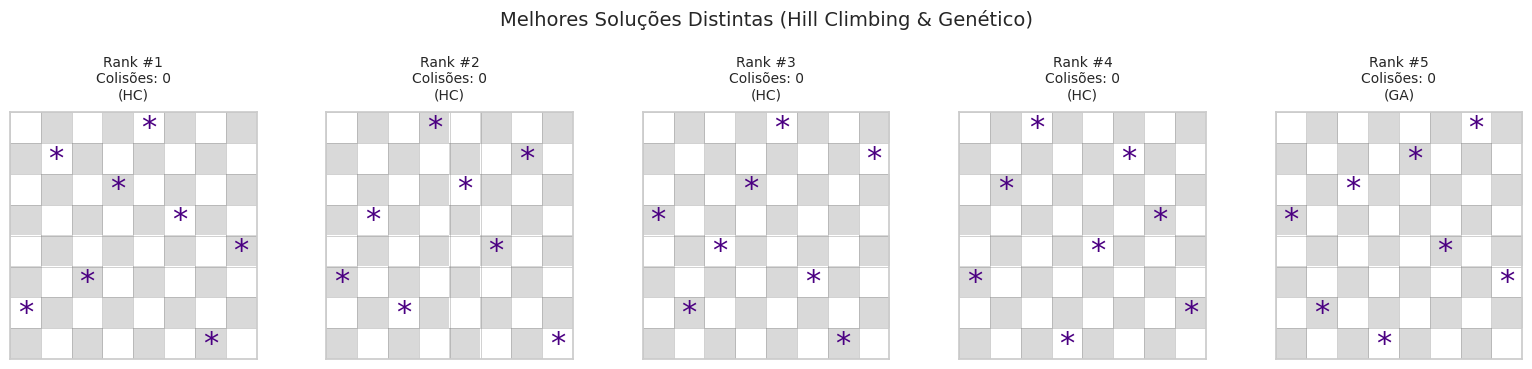

In [ ]:
def draw_board(solution, ax, title):
    """
    Desenha um tabuleiro de xadrez 8x8 com as rainhas pra colocar no relatório final
    solution: lista de 8 inteiros [linha_da_coluna_0, linha_da_coluna_1, ...]
    """

    board = np.zeros((8, 8))
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1
    
    ax.imshow(board, cmap='binary', interpolation='nearest', alpha=0.15)
    
    ax.set_xticks(np.arange(-0.5, 8, 1))
    ax.set_yticks(np.arange(-0.5, 8, 1))
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False) 
    
 
    for col, row in enumerate(solution):
        ax.text(col, row, '*', fontsize=22, ha='center', va='center', color='#4B0082')
        
    ax.set_title(title, fontsize=10, pad=10)

top_solutions = (
    df.sort_values(by='Colisões')
      .drop_duplicates(subset='Solução')
      .head(5)
)

if len(top_solutions) > 0:
    fig, axes = plt.subplots(1, 5, figsize=(16, 3.5))
    if len(top_solutions) < 5: axes = axes.flatten() 
    
    fig.suptitle('Melhores Soluções Distintas (Hill Climbing & Genético)', fontsize=14, y=1.05)
    
    for i, (idx, row) in enumerate(top_solutions.iterrows()):
        if isinstance(row['Solução'], str):
            sol_list = ast.literal_eval(row['Solução'])
        else:
            sol_list = row['Solução']
            
        algo_name = "HC" if "Hill" in row['Algoritmo'] else "GA"
        title = f"Rank #{i+1}\nColisões: {row['Colisões']}\n({algo_name})"
        
        if i < len(axes):
            draw_board(sol_list, axes[i], title)
            
    plt.tight_layout()
    plt.show()
else:
    print(" Nenhuma solução encontrada no DataFrame.")